In [1]:
library(caret)


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df = read.csv("titanic.csv")
head(df)


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


In [3]:
retrieve_factor_columns = function(df)
{
    data_types = as.data.frame(sapply(df,class))
    indices = rownames(data_types)
    colnames(data_types) = "Data_Type"
    data_types$Column_Name = rownames(data_types)
    rownames(data_types) = 1:dim(data_types)[1]
    data_types = data_types[,c("Column_Name","Data_Type")]
    factors = data_types[data_types$Data_Type == "factor",]
    rownames(factors) = 1:dim(factors)[1]
    factor_columns = factors$Column_Name
    return(factor_columns)
}


In [4]:
df_1 = df[,!colnames(df) %in% c("Cabin","Name","PassengerId")]
df_1$Ticket = as.numeric(as.character(df_1$Ticket))
df_1$Sex = as.numeric(factor(x=df_1$Sex)) - 1
df_1$Embarked = as.numeric(factor(x=df_1$Embarked)) - 1
df_1 = df_1[!duplicated(df_1),]
df_1 = na.omit(df_1)
head(df_1)


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,330911,7.8292,1
1,3,0,47.0,1,0,363272,7.0000,2
0,2,1,62.0,0,0,240276,9.6875,1
0,3,1,27.0,0,0,315154,8.6625,2
1,3,0,22.0,1,1,3101298,12.2875,2
0,3,1,14.0,0,0,7538,9.2250,2


In [8]:
X = df_1[,!colnames(df_1) %in% c("Survived")]
rownames(X) = 1:dim(X)[1]
y = as.data.frame(df_1[,"Survived"])
rownames(y) = 1:dim(y)[1]
indices = 1:dim(X)[1]
indices_shuffled = sample(indices)
train_indices = indices[1:round(0.8*dim(X)[1])]
test_indices = indices[round(0.8*dim(X)[1])+1:dim(X)[1]]


In [29]:
X_train = na.omit(X[train_indices,])
X_test = na.omit(X[test_indices,])
y_train = na.omit(y[train_indices,])
y_test = na.omit(y[test_indices,])


In [30]:
linear_reg = lm(X_train,X_test)
y_pred = predict(linear_reg,X_test)


In [32]:
rms_error = sqrt((sum(abs(y_test - y_pred)*abs(y_test - y_pred)))/dim(X_test)[1])


In [33]:
rms_error


[1] 1.896426

In [34]:
summary(df_1)


    Survived          Pclass          Sex              Age       
 Min.   :0.0000   Min.   :1.00   Min.   :0.0000   Min.   : 0.33  
 1st Qu.:0.0000   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:21.00  
 Median :0.0000   Median :2.00   Median :1.0000   Median :27.00  
 Mean   :0.3636   Mean   :2.19   Mean   :0.6364   Mean   :30.00  
 3rd Qu.:1.0000   3rd Qu.:3.00   3rd Qu.:1.0000   3rd Qu.:38.00  
 Max.   :1.0000   Max.   :3.00   Max.   :1.0000   Max.   :76.00  
     SibSp            Parch            Ticket             Fare        
 Min.   :0.0000   Min.   :0.0000   Min.   :    680   Min.   :  0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  20589   1st Qu.:  7.896  
 Median :0.0000   Median :0.0000   Median : 228414   Median : 13.500  
 Mean   :0.4545   Mean   :0.3377   Mean   : 232095   Mean   : 34.003  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.: 347071   3rd Qu.: 31.944  
 Max.   :4.0000   Max.   :5.0000   Max.   :3101298   Max.   :263.000  
    Embarked    
 Min.   :0.000  
 1st Qu

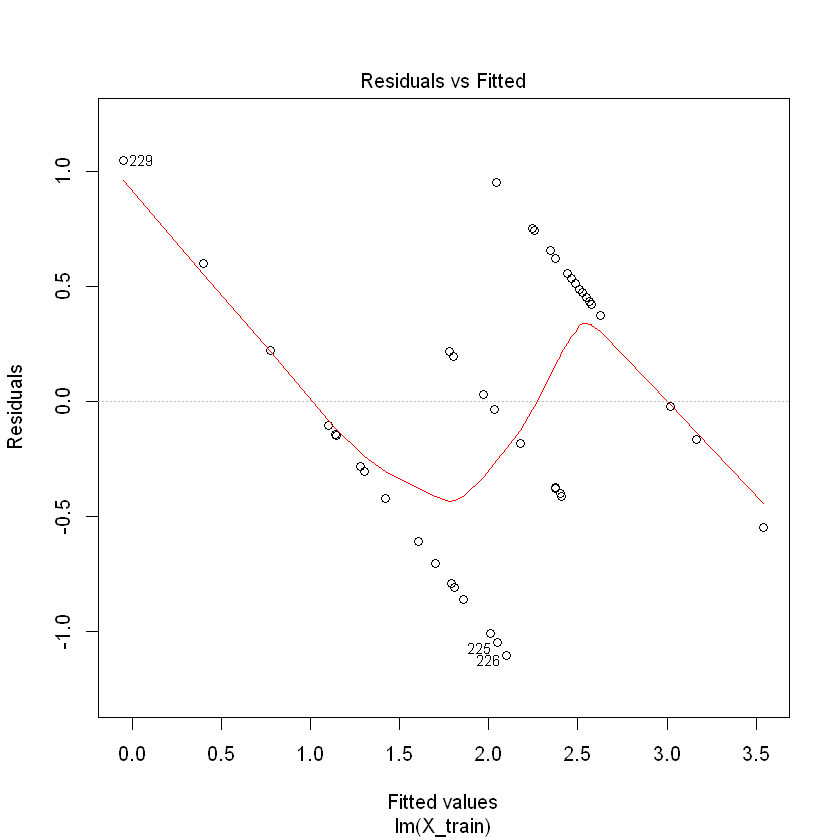

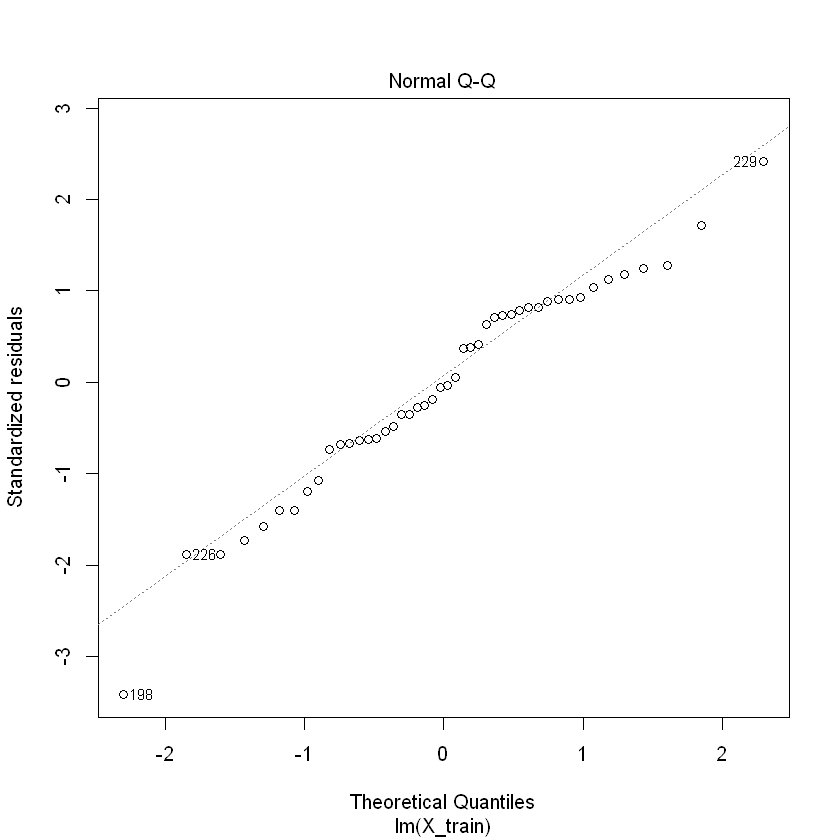

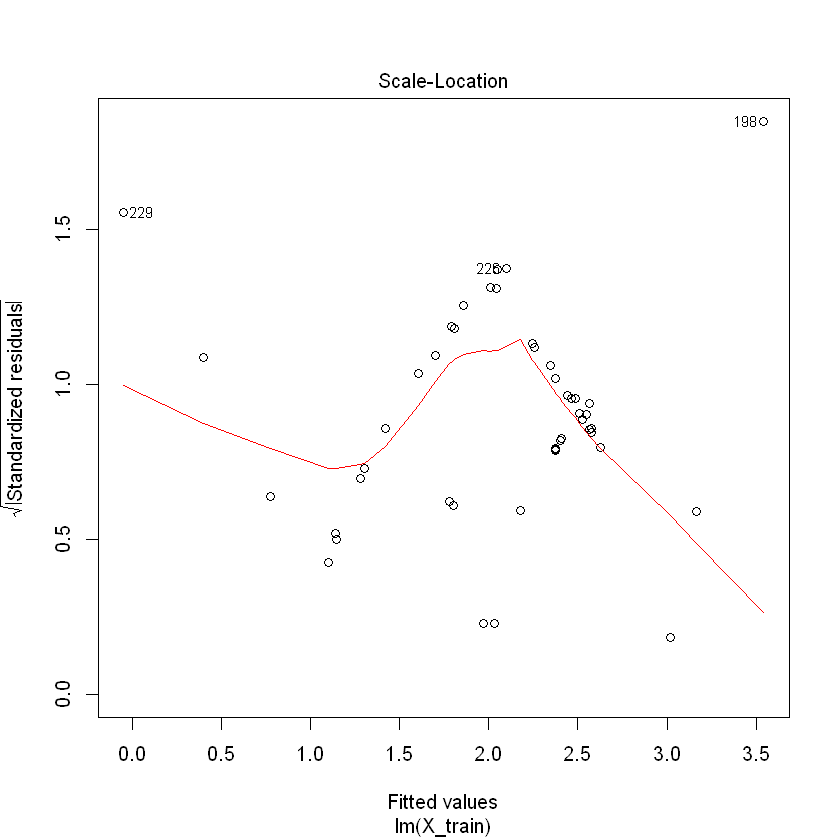

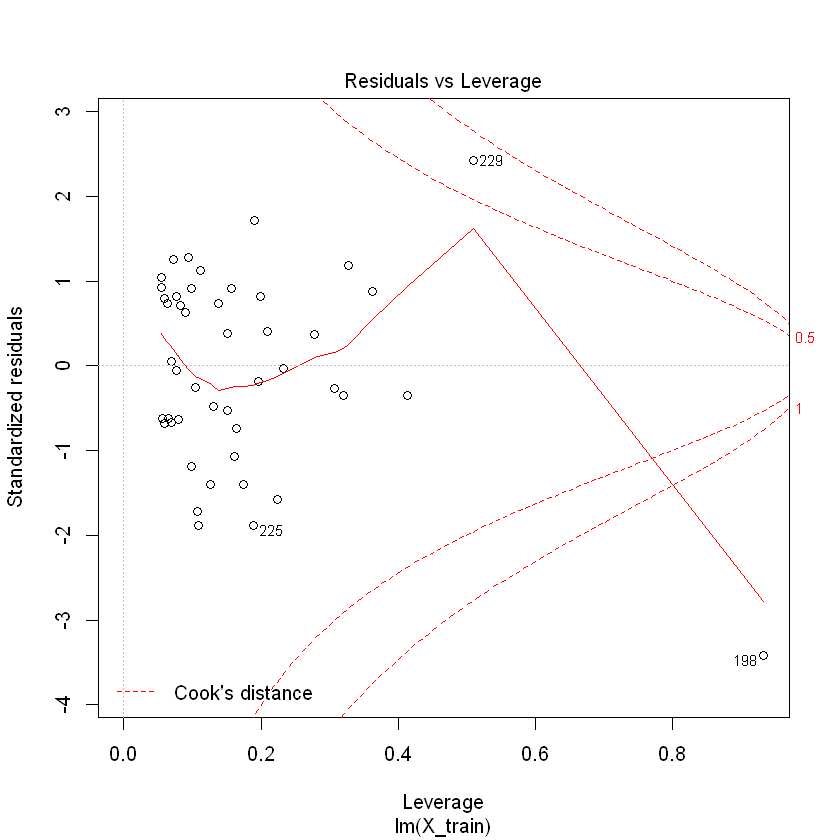

In [35]:
plot(linear_reg)


In [36]:
head(df_1)


Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,330911,7.8292,1
1,3,0,47.0,1,0,363272,7.0000,2
0,2,1,62.0,0,0,240276,9.6875,1
0,3,1,27.0,0,0,315154,8.6625,2
1,3,0,22.0,1,1,3101298,12.2875,2
0,3,1,14.0,0,0,7538,9.2250,2


In [37]:
unique(df_1$Pclass)


[1] 3 2 1

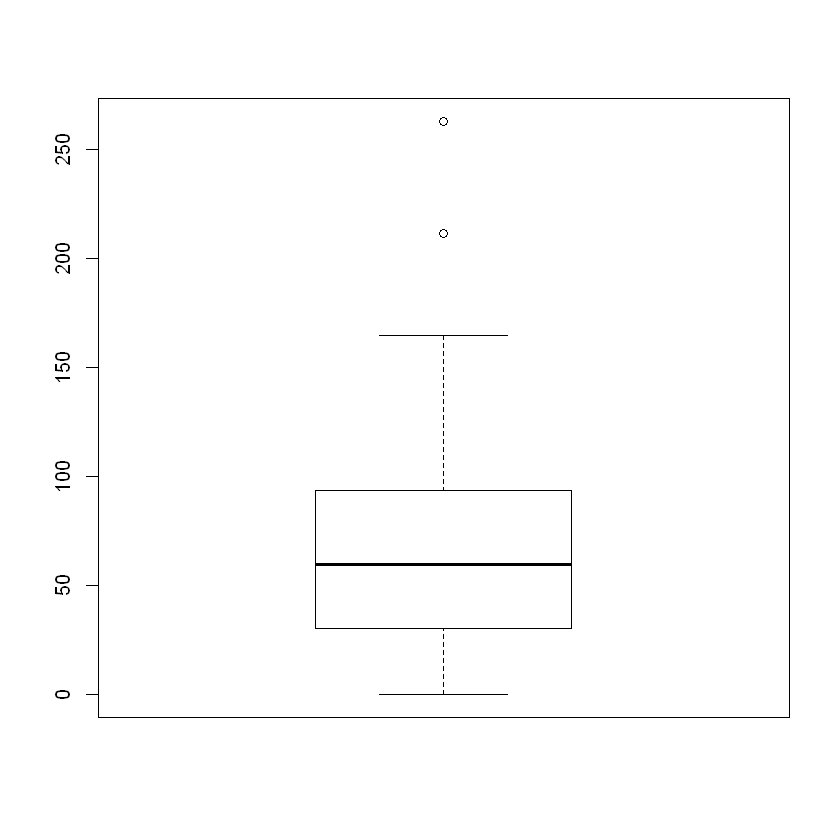

In [48]:
boxplot(df_1[df_1$Pclass==1,]$Fare)


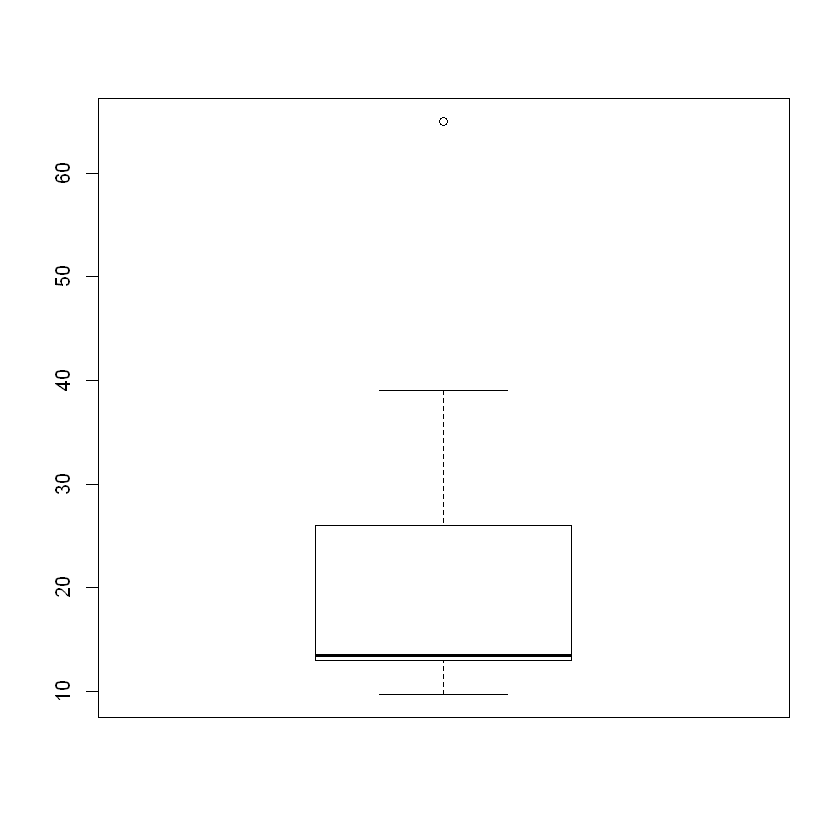

In [49]:
boxplot(df_1[df_1$Pclass==2,]$Fare)


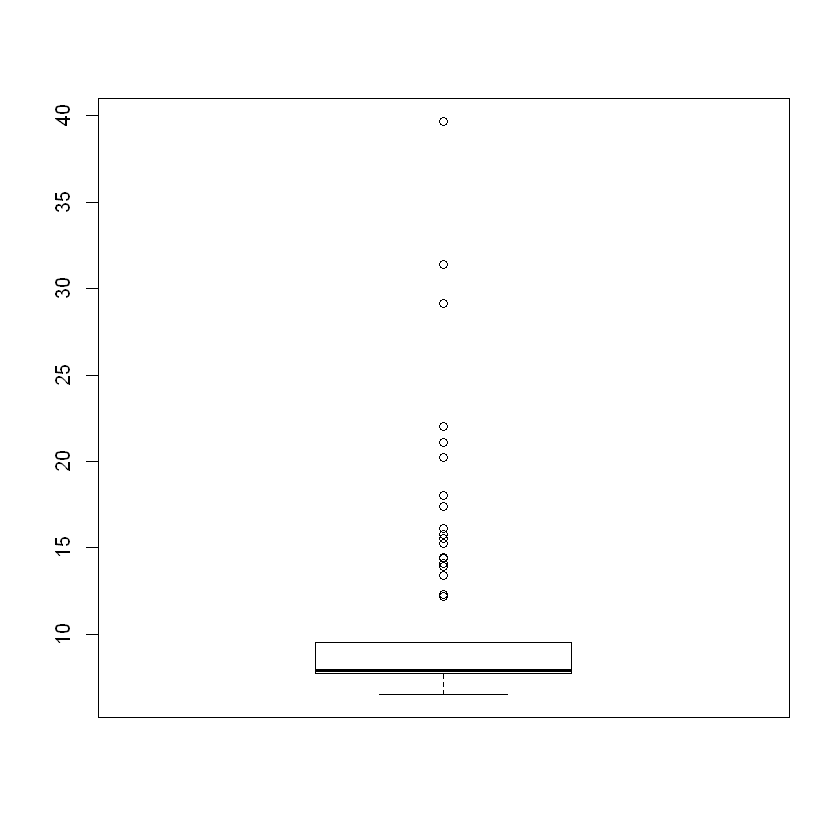

In [50]:
boxplot(df_1[df_1$Pclass==3,]$Fare)


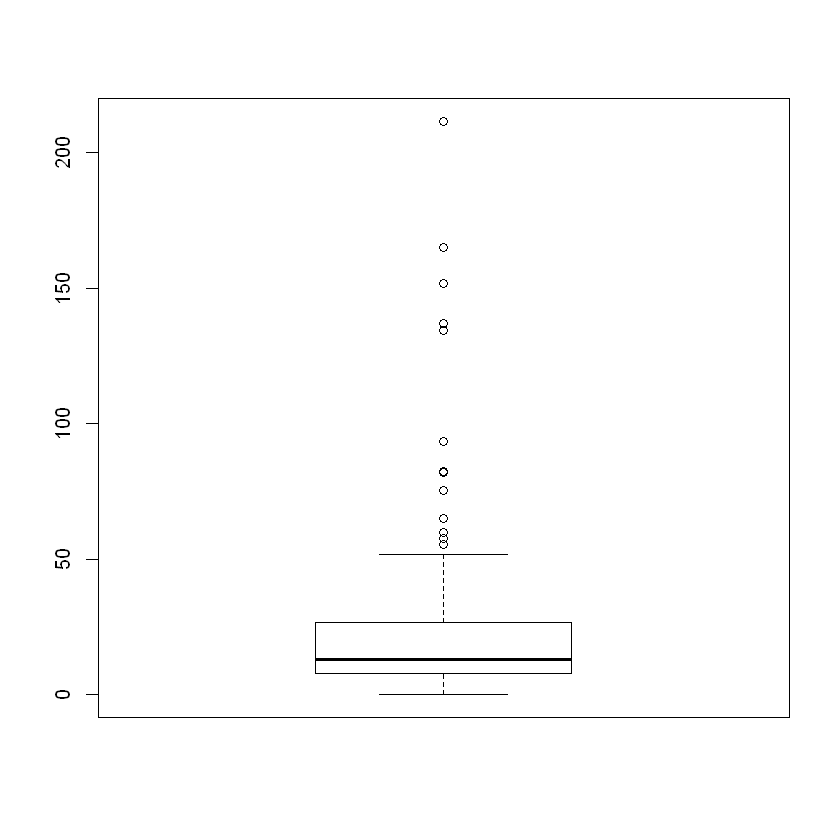

In [51]:
boxplot(df_1[df_1$Sex==1,]$Fare)


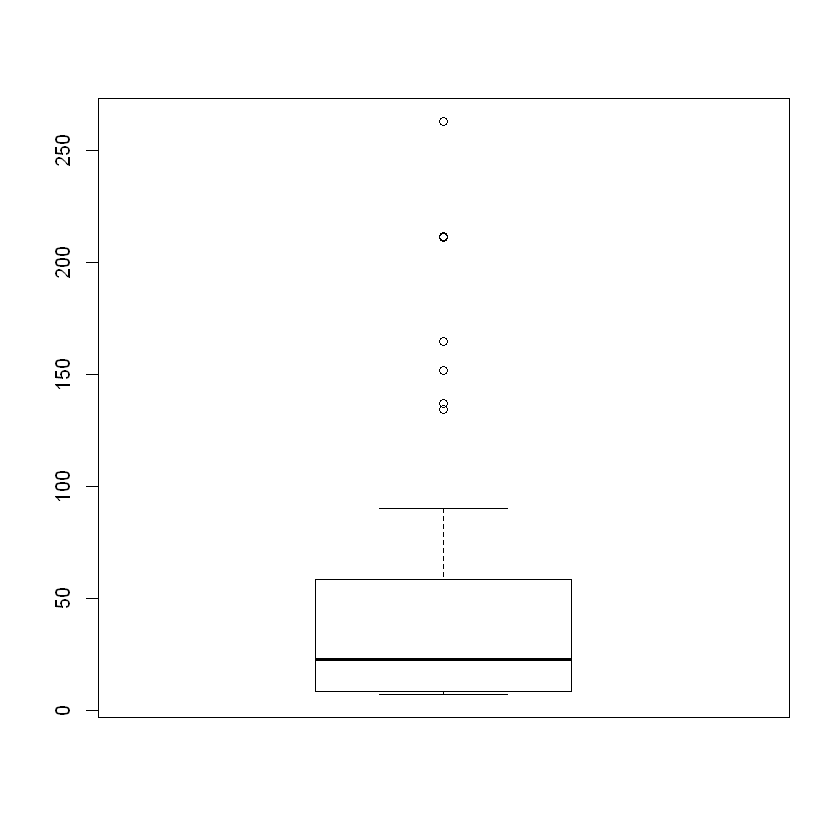

In [52]:
boxplot(df_1[df_1$Sex==0,]$Fare)
